In [5]:
# import packages and tools
import sys, os
import numpy as np
from numpy.linalg import eig
from tools_box import *
from estimators import *

In [13]:
cm = np.load('total_converted.npy')
print cm.shape
nstates = 2

(20, 60001)


In [14]:
# create implied timescale files
fout = open('implied_timescales.dat','w')
header = '# tau(ns)\tround\timplied_timescale(ns)'
#print header
fout.write(header+'\n')


In [15]:
# construct raw transition count matrix
bootstrap = True
r = 2   # 2 rounds of bootstrapping
sm = 1  # 4 slow motions to compute



In [16]:
if (1):
    if bootstrap:
        for i in range(r):
            new_cm = []   # create a new count matrix
            traj = np.random.choice(cm.shape[0],cm.shape[0])   # randomly pick up 20 trajectories (sample with replacement)
            print traj
            for j in traj:
                new_cm.append(cm[j])  
            new_cm = np.array(new_cm) # make this new matrix in numpy array format

            print "constructing transition count matrix..."
            tau_values = [1,10,100,150,200,300,400,500,600,1000,1500,2000,2500,3000]  # lagtimes
            for tau in tau_values:
                tau_in_ns = tau*0.1   # tau is in unit of ns
                print "lagtime = ", tau_in_ns,'ns'
                tcm = construct_raw_tcm(new_cm,tau,nstates)  # construct transition count matrix based on tau
                tcm[tcm==0.] = 0.0000001   # add pseudocount if there is any zero count
                np.save('raw_tcm_tau%d_r%d.npy'%(tau,i),tcm)    # saving
                # construct transition probability matrix
                print "constructing transition probability matrix..."
#                tpm = construct_tpm(tcm)
                tpm = MLE_tProb_reversible(tcm)    # using MLE estimators
                np.save('tpm_%d.npy'%tau,tpm)
                print "computing eigenvalues and eigenvectors..."
                try:
                    mu, eigenvectors = eig(tpm.transpose())    # compute eigenvalues and eigenvectors
                    #print "mu", mu, "eigenvectors",eigenvectors
                    for j in range(sm):
                        implied_timescale_in_ns = -1.0*tau_in_ns/np.log(mu[j+1])   
                        outstr = '%6.3f\t%d\t%6.3f'%(tau_in_ns, i, implied_timescale_in_ns)  # implied timescales for specific tau for ith round bootstrap
                        #print 'writing data...'
                        fout.write(outstr+'\n')
                except:
                    'Skipped'
                #fout.write(outstr+'\n')
        print "Done!"
        fout.close()
        
    # if bootstrap is not used
    else:
        k = 1    # only 1 round 
        print "constructing transition count matrix..."
        tau_values = [1,10,100,150,200,300,400,500,600,1000,1500,2000,2500,3000]
        for tau in tau_values:
            tau_in_ns = tau*0.1
            print "lagtime = ", tau_in_ns,'ns'
            cm = 'clustered_matrix.npy'
            tcm = construct_raw_tcm(cm,tau,nstates)
            tcm[tcm==0.] = 0.0000001 
            np.save('raw_tcm_%d.npy'%tau,tcm)
            # construct transition probability matrix
            print "constructing transition probability matrix..."
#            tpm = construct_tpm(tcm)
            tpm = MLE_tProb_reversible(tcm)
            np.save('tpm_%d.npy'%tau,tpm)
            print "computing eigenvalues and eigenvectors..."
            try:
                mu, eigenvectors = eig(tpm.transpose())
              #  print "mu", mu, "eigenvectors",eigenvectors
                for j in range(sm):
                    implied_timescale_in_ns = -1.0*tau_in_ns/np.log(mu[j+1])
                    outstr = '%6.3f\t%d\t%6.3f'%(tau_in_ns, k, implied_timescale_in_ns)
                    fout.write(outstr+'\n')
            except:
                'Skipped'
        print "Done!"
        fout.close()

[16 18 13 13 15 13  9  9 11  7 10  2  8  9  7 18  6  7  6 12]
constructing transition count matrix...
lagtime =  0.1 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  1.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  10.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  15.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  20.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  30.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  40.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  50.0 ns
constructing transition probability matrix...
computing eigenvalues and eigenvectors...
lagtime =  60.0 ns
constructing transition p

/Users/yunhuige/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in log


In [17]:
# show implied timescales file
with open("implied_timescales.dat") as f:
        lines=f.readlines()
for line in lines:
    print line


# tau(ns)	round	implied_timescale(ns)

 0.100	0	 0.418

 1.000	0	 1.832

10.000	0	 3.308

15.000	0	   nan

20.000	0	   nan

30.000	0	   nan

40.000	0	   nan

50.000	0	   nan

60.000	0	   nan

100.000	0	21.193

150.000	0	   nan

200.000	0	32.790

250.000	0	   nan

300.000	0	48.566

 0.100	1	 0.422

 1.000	1	 1.851

10.000	1	 3.211

15.000	1	 2.937

20.000	1	 2.787

30.000	1	   nan

40.000	1	 6.607

50.000	1	   nan

60.000	1	   nan

100.000	1	18.862

150.000	1	   nan

200.000	1	36.385

250.000	1	   nan

300.000	1	   nan



plotting figures...
Done!


/Users/yunhuige/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


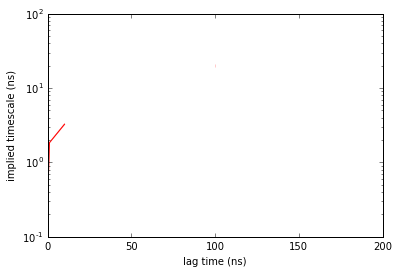

In [18]:
# plot implied timescales
print "plotting figures..."
from matplotlib import pyplot as plt
%matplotlib inline

color=['red','blue','green','magenta']
if bootstrap:
    data = np.loadtxt('implied_timescales.dat')
    tau_values = [1,10,100,150,200,300,400,500,600,1000,1500,2000,2500,3000]  # double check if this tau values are the same as above shown
    lagtime=[[] for i in range(sm)]
    implied=[[] for i in range(sm)]
    err=[[] for i in range(sm)]
    for j in range(sm):
        for i in range(len(tau_values)):    # if this part is too hard to understand, I suggest load the implied timescales file in an ipython window and do these operation then it will be clear
            lagtime[j].append(data[(j+i*sm)::len(tau_values)*sm][0][0])  # append lagtime for each slow motion
            implied[j].append(np.mean(data[(j+i*sm)::len(tau_values)*sm][::,2]))  # append averaged implied timescale between different rounds bootstrapping for each lagtime
            err[j].append(np.std(data[(j+i*sm)::len(tau_values)*sm][::,2]))      # append standard deviation of implied timescales between different round bootstrapping for each lagtime

    for i in range(sm):
        plt.plot(lagtime[i],implied[i],color=color[i])
        plt.fill_between(lagtime[i],np.array(implied[i])+np.array(err[i]),np.array(implied[i])-np.array(err[i]),color=color[i],alpha=0.2)
        plt.yscale('log')
        plt.xlabel('lag time (ns)')
        plt.ylabel('implied timescale (ns)')
        plt.savefig('implied_timescale_%d.pdf'%nstates)
    print 'Done!'

else:
    data = np.loadtxt('implied_timescales.dat')
    lagtime=[[] for i in range(sm)]
    implied=[[] for i in range(sm)]
    err=[[] for i in range(sm)]
    for j in range(sm):
        for i in range(len(tau_values)):
            lagtime[j].append(data[(j+i*sm)::len(tau_values)*sm][0][0])
            implied[j].append(np.mean(data[(j+i*sm)::len(tau_values)*sm][::,2]))
            err[j].append(np.std(data[(j+i*sm)::len(tau_values)*sm][::,2]))

    for i in range(sm):
        plt.plot(lagtime[i],implied[i],color=color[i])
        plt.yscale('log')
        plt.xlabel('lag time (ns)')
        plt.ylabel('implied timescale (ns)')
        plt.savefig('implied_timescale_%d.pdf'%nstates)
    print 'Done!'
